In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv("iris.csv")

In [3]:
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']

In [7]:
iris_data.columns = columns
iris_data.head()

Sepal_length  Sepal_width  Petal_length  Petal_width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_data.describe()

Sepal_length  Sepal_width  Petal_length  Petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [10]:
iris_data["Species"].value_counts() 

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [62]:
iris_data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

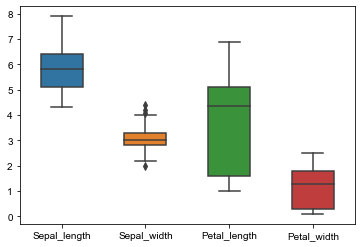

In [11]:
sns.boxplot(data = iris_data, width= 0.5, fliersize = 5)
sns.set(rc = {"figure.figsize" :(6,6)})

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

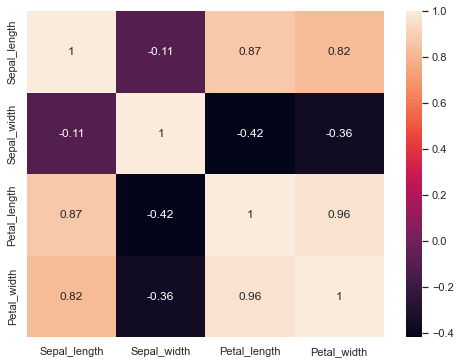

In [12]:
#Plotting a heatmap to determine the correlation between column quantities
corr=iris_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
iris_data.columns

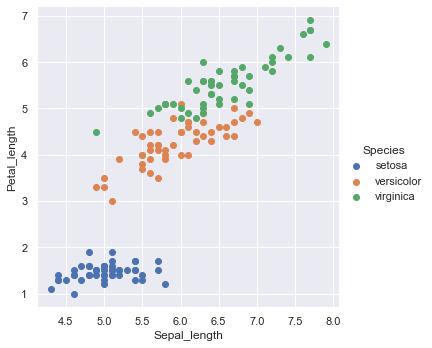

In [13]:
sns.FacetGrid(iris_data,hue="Species",height=5).map(plt.scatter,"Sepal_length","Petal_length").add_legend()

In [14]:
X = iris_data[["Sepal_length","Sepal_width","Petal_length","Petal_width"]].values
Y = iris_data[["Species"]].values

In [15]:
from sklearn.linear_model import LogisticRegression
Model =  LogisticRegression()
Model.fit(X,Y)

C:\Users\SANGEETA K SHARMA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
Model.score(X,Y).round(2)

0.97

In [17]:
Actual = Y
predicted = Model.predict(X)

In [18]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [19]:
print(metrics.confusion_matrix(Actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [20]:
predicted = Model.predict([[5.1,3.5,1.4,0.2]])
predicted

array(['setosa'], dtype=object)